# <div align='center'>Assignment #1: Marketing Analytics</div>
#### <div align='right'>정상욱 교수님<br><br>201402167 경영학전공 윤현우</div>

# <span style="color:red">Setting</span>  

In [1]:
# library import
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Iris data download
iris = datasets.load_iris ( )

In [3]:
iris_X = iris.data   # vector of feature. [septal length, septal width, petal length, petal width]
iris_y = iris.target # vector of label. setosa = 0, versicolor = 1, virginica = 2

In [51]:
indices = np.random.permutation(len(iris_X)) # array of shuffled number (from 0 to 149)
iris_X_train = iris_X[indices[:-40]] 
iris_y_train = iris_y[indices[:-40]] 
iris_X_valid = iris_X[indices[-40:-20]] 
iris_y_valid = iris_y[indices[-40:-20]] 
iris_X_test = iris_X[indices[-20:]] 
iris_y_test = iris_y[indices[-20:]]

##### <span style="color:orange">validation set에 대하여</span> 

- <strong>validation set은 모델의 성능을 평가하기 위해 사용한다.</strong> 주의할 점은 testing하는 과정과는 다르다는 것이며 최종적으로는 test accuracy를 향상시키기 위해, 아울러 over-fitting 문제를 해결하기 위해 validation set을 이용한다는 것을 인지하자. training 과정에 관여를 하는 것이며 testing 과정에 관여를 하는 것이 아니다.<br><br>
  
- training이 된 여러가지 모델 중 가장 좋은 하나의 모델을 고르기 위한 data set으로, training set의 일부를 희생시킨다고 생각할 수도 있다.<br><br>

- 하지만 이 희생을 감수하지 못할만큼 data set의 크기가 작다면 cross-validation 이라는 방법을 쓰기도 한다.<br>

출처: https://3months.tistory.com/118?fbclid=IwAR3TuI5FkkIh3YSLQtBSkC4OOEUlLRy2DWu_oj54IlcKV-0sgBBTXKyKNvI [Deep Play]


---
# <span style="color:red">Linear Support Vector Machine Classifier</span> 

### Fitting

In [52]:
clf = SVC(kernel = 'linear')
clf.fit(iris_X_train,iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### Prediction

In [53]:
preds = clf.predict(iris_X_test)

label_0 = 0
label_1 = 0
label_2 = 0
for elem in preds:
    if elem == 0:
        label_0 += 1
    elif elem == 1:
        label_1 += 1
    else:
        label_2 += 1

print(preds)
print('That is, Test Data is classified {} of the test data were categorized as setosa, {} as verticolors and {} as virginica.'
      .format(label_0, label_1, label_2))

[1 1 1 0 2 0 2 2 1 2 1 2 1 1 0 2 1 2 2 1]
That is, Test Data is classified 3 of the test data were categorized as setosa, 9 as verticolors and 8 as virginica.


### Accuracy Report

In [54]:
print('Accuracy of Linear Support Vector Machine is {:.2f}.'.format(accuracy_score(iris_y_test, preds)))

Accuracy of Linear Support Vector Machine is 0.90.


---
# <span style="color:red">Nonlinear Support Vector Machine Classifier</span>  

### Fitting

In [55]:
clf=SVC(kernel='rbf', gamma='auto')
clf.fit(iris_X_train, iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### Prediction using valid data set

In [56]:
preds = clf.predict(iris_X_valid)

label_0 = 0
label_1 = 0
label_2 = 0
for elem in preds:
    if elem == 0:
        label_0 += 1
    elif elem == 1:
        label_1 += 1
    else:
        label_2 += 1

print(preds)
print('That is, Test Data is classified {} of the test data were categorized as setosa, {} as verticolors and {} as virginica.'
      .format(label_0, label_1, label_2))

[2 0 2 0 1 2 0 1 0 2 1 1 1 2 1 1 0 0 2 2]
That is, Test Data is classified 6 of the test data were categorized as setosa, 7 as verticolors and 7 as virginica.


### Accuracy Report

In [57]:
print('Accuracy of Linear Support Vector Machine is {:.2f}.'.format(accuracy_score(iris_y_valid, preds)))

Accuracy of Linear Support Vector Machine is 0.90.


### Tunning of Parameter C & Gamma

> C = 10, gamma = 1

In [58]:
clf=SVC(kernel='rbf', C=10.0, gamma=1.0)
clf.fit(iris_X_train, iris_y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
preds = clf.predict(iris_X_valid)

label_0 = 0
label_1 = 0
label_2 = 0
for elem in preds:
    if elem == 0:
        label_0 += 1
    elif elem == 1:
        label_1 += 1
    else:
        label_2 += 1

print(preds)
print('That is, Test Data is classified {} of the test data were categorized as setosa, {} as verticolors and {} as virginica.'
      .format(label_0, label_1, label_2))

[2 0 2 0 2 2 0 1 0 2 1 2 1 2 1 2 0 0 2 2]
That is, Test Data is classified 6 of the test data were categorized as setosa, 4 as verticolors and 10 as virginica.


In [60]:
print('Accuracy of Linear Support Vector Machine is {:.2f}.'.format(accuracy_score(iris_y_valid, preds)))

Accuracy of Linear Support Vector Machine is 0.95.


> C = 10, gamma = 10

In [61]:
clf=SVC(kernel='rbf', C=10.0, gamma=10.0)
clf.fit(iris_X_train, iris_y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
preds = clf.predict(iris_X_valid)

label_0 = 0
label_1 = 0
label_2 = 0
for elem in preds:
    if elem == 0:
        label_0 += 1
    elif elem == 1:
        label_1 += 1
    else:
        label_2 += 1

print(preds)
print('That is, Test Data is classified {} of the test data were categorized as setosa, {} as verticolors and {} as virginica.'
      .format(label_0, label_1, label_2))

[2 0 2 0 2 2 0 1 0 2 1 2 1 2 1 2 0 0 2 2]
That is, Test Data is classified 6 of the test data were categorized as setosa, 4 as verticolors and 10 as virginica.


In [63]:
print('Accuracy of Linear Support Vector Machine is {:.2f}.'.format(accuracy_score(iris_y_valid, preds)))

Accuracy of Linear Support Vector Machine is 0.95.


> C = 10, gamma = 100

In [64]:
clf=SVC(kernel='rbf', C=10.0, gamma=100.0)
clf.fit(iris_X_train, iris_y_train)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [65]:
preds = clf.predict(iris_X_valid)

label_0 = 0
label_1 = 0
label_2 = 0
for elem in preds:
    if elem == 0:
        label_0 += 1
    elif elem == 1:
        label_1 += 1
    else:
        label_2 += 1

print(preds)
print('That is, Test Data is classified {} of the test data were categorized as setosa, {} as verticolors and {} as virginica.'
      .format(label_0, label_1, label_2))

[2 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1]
That is, Test Data is classified 4 of the test data were categorized as setosa, 15 as verticolors and 1 as virginica.


In [66]:
print('Accuracy of Linear Support Vector Machine is {:.2f}.'.format(accuracy_score(iris_y_valid, preds)))

Accuracy of Linear Support Vector Machine is 0.50.


> C = 100, gamma = 1

In [67]:
clf=SVC(kernel='rbf', C=100.0, gamma=1.0)
clf.fit(iris_X_train, iris_y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
preds = clf.predict(iris_X_valid)

label_0 = 0
label_1 = 0
label_2 = 0
for elem in preds:
    if elem == 0:
        label_0 += 1
    elif elem == 1:
        label_1 += 1
    else:
        label_2 += 1

print(preds)
print('That is, Test Data is classified {} of the test data were categorized as setosa, {} as verticolors and {} as virginica.'
      .format(label_0, label_1, label_2))

[2 0 2 0 2 2 0 1 0 2 1 2 1 2 1 2 0 0 2 2]
That is, Test Data is classified 6 of the test data were categorized as setosa, 4 as verticolors and 10 as virginica.


In [69]:
print('Accuracy of Linear Support Vector Machine is {:.2f}.'.format(accuracy_score(iris_y_valid, preds)))

Accuracy of Linear Support Vector Machine is 0.95.


> C = 100, gamma = 10

In [70]:
clf=SVC(kernel='rbf', C=100, gamma=10.0)
clf.fit(iris_X_train, iris_y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [71]:
preds = clf.predict(iris_X_valid)

label_0 = 0
label_1 = 0
label_2 = 0
for elem in preds:
    if elem == 0:
        label_0 += 1
    elif elem == 1:
        label_1 += 1
    else:
        label_2 += 1

print(preds)
print('That is, Test Data is classified {} of the test data were categorized as setosa, {} as verticolors and {} as virginica.'
      .format(label_0, label_1, label_2))

[2 0 2 0 2 2 0 1 0 2 1 2 1 2 1 2 0 0 2 2]
That is, Test Data is classified 6 of the test data were categorized as setosa, 4 as verticolors and 10 as virginica.


In [72]:
print('Accuracy of Linear Support Vector Machine is {:.2f}.'.format(accuracy_score(iris_y_valid, preds)))

Accuracy of Linear Support Vector Machine is 0.95.


> C = 100, gamma = 100

In [74]:
clf=SVC(kernel='rbf', C=100.0, gamma=100.0)
clf.fit(iris_X_train, iris_y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [75]:
preds = clf.predict(iris_X_valid)

label_0 = 0
label_1 = 0
label_2 = 0
for elem in preds:
    if elem == 0:
        label_0 += 1
    elif elem == 1:
        label_1 += 1
    else:
        label_2 += 1

print(preds)
print('That is, Test Data is classified {} of the test data were categorized as setosa, {} as verticolors and {} as virginica.'
      .format(label_0, label_1, label_2))

[2 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1]
That is, Test Data is classified 4 of the test data were categorized as setosa, 15 as verticolors and 1 as virginica.


In [76]:
print('Accuracy of Linear Support Vector Machine is {:.2f}.'.format(accuracy_score(iris_y_valid, preds)))

Accuracy of Linear Support Vector Machine is 0.50.


> C = 1000, gamma = 1

In [77]:
clf=SVC(kernel='rbf', C=1000.0, gamma=1.0)
clf.fit(iris_X_train, iris_y_train)

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
preds = clf.predict(iris_X_valid)

label_0 = 0
label_1 = 0
label_2 = 0
for elem in preds:
    if elem == 0:
        label_0 += 1
    elif elem == 1:
        label_1 += 1
    else:
        label_2 += 1

print(preds)
print('That is, Test Data is classified {} of the test data were categorized as setosa, {} as verticolors and {} as virginica.'
      .format(label_0, label_1, label_2))

[2 0 2 0 2 2 0 1 0 2 1 2 1 2 1 2 0 0 2 2]
That is, Test Data is classified 6 of the test data were categorized as setosa, 4 as verticolors and 10 as virginica.


In [79]:
print('Accuracy of Linear Support Vector Machine is {:.2f}.'.format(accuracy_score(iris_y_valid, preds)))

Accuracy of Linear Support Vector Machine is 0.95.


> C = 1000, gamma = 10

In [80]:
clf=SVC(kernel='rbf', C=1000.0, gamma=10.0)
clf.fit(iris_X_train, iris_y_train)

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [81]:
preds = clf.predict(iris_X_valid)

label_0 = 0
label_1 = 0
label_2 = 0
for elem in preds:
    if elem == 0:
        label_0 += 1
    elif elem == 1:
        label_1 += 1
    else:
        label_2 += 1

print(preds)
print('That is, Test Data is classified {} of the test data were categorized as setosa, {} as verticolors and {} as virginica.'
      .format(label_0, label_1, label_2))

[2 0 2 0 2 2 0 1 0 2 1 2 1 2 1 2 0 0 2 2]
That is, Test Data is classified 6 of the test data were categorized as setosa, 4 as verticolors and 10 as virginica.


In [82]:
print('Accuracy of Linear Support Vector Machine is {:.2f}.'.format(accuracy_score(iris_y_valid, preds)))

Accuracy of Linear Support Vector Machine is 0.95.


> C = 1000, gamma = 100

In [83]:
clf=SVC(kernel='rbf', C=1000.0, gamma=100.0)
clf.fit(iris_X_train, iris_y_train)

SVC(C=1000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100.0, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [84]:
preds = clf.predict(iris_X_valid)

label_0 = 0
label_1 = 0
label_2 = 0
for elem in preds:
    if elem == 0:
        label_0 += 1
    elif elem == 1:
        label_1 += 1
    else:
        label_2 += 1

print(preds)
print('That is, Test Data is classified {} of the test data were categorized as setosa, {} as verticolors and {} as virginica.'
      .format(label_0, label_1, label_2))

[2 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1]
That is, Test Data is classified 4 of the test data were categorized as setosa, 15 as verticolors and 1 as virginica.


In [85]:
print('Accuracy of Linear Support Vector Machine is {:.2f}.'.format(accuracy_score(iris_y_valid, preds)))

Accuracy of Linear Support Vector Machine is 0.50.


##### <span style="color:orange">Result</span>

gamma는 C에 비해 값을 약간만 수정하여도 accuracy에 많은 영향을 주었다.<br>
본 테스트에서는 gamma = 10 일 경우, gamma = 1 일 때보다 accuracy가 0.5 하락하였다.<br>

### Prediction using test data set

---
# <span style="color:red">Visualization</span>

### setting

In [86]:
iris_X = iris.data[:, :2] #array of first feature and second feature 
iris_y = iris.target
indices = np.random.permutation(len(iris_X)) 
iris_X_train = iris_X[indices[:-40]] 
iris_y_train = iris_y[indices[:-40]] 
iris_X_valid = iris_X[indices[-40:-20]] 
iris_y_valid = iris_y[indices[-40:-20]] 
iris_X_test = iris_X[indices[-20:]] 
iris_y_test = iris_y[indices[-20:]]

In [87]:
%matplotlib inline 
import matplotlib.pyplot as plt
def plot_contours(ax, clf, xx, yy, **params): 
    """Plot the decision boundaries for a classifier.
Parameters 
---------
ax: matplotlib axes object 
clf: a classifier 
xx: meshgrid ndarray 
yy: meshgrid ndarray 
params: dictionary of params to pass to contourf, optional """ 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    out = ax.contourf(xx, yy, Z, **params) 
    return out

In [88]:
def make_meshgrid(x, y, h=.02): 
    x_min, x_max = x.min() - 1, x.max() + 1 
    y_min, y_max = y.min() - 1, y.max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    return xx, yy

### visualization plot

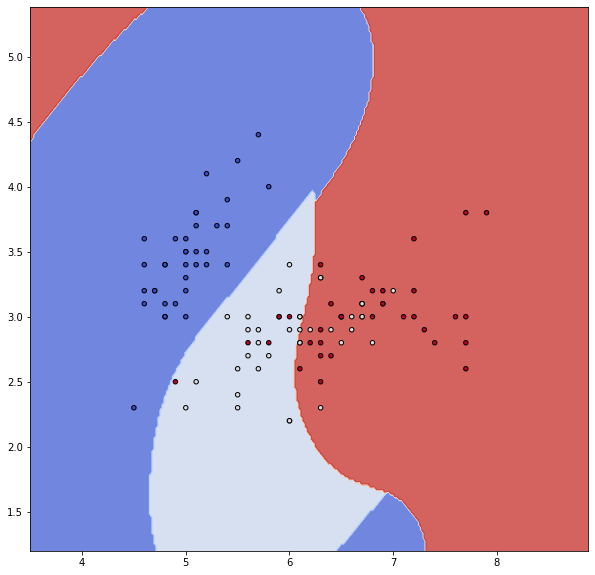

In [89]:
svc = SVC(kernel='rbf', C=5, gamma=1.0) 
pred = svc.fit(iris_X_train, iris_y_train)

U, V = iris_X_train[:, 0], iris_X_train[:, 1] 
xx, yy = make_meshgrid(U, V)

figsize = 10 
fig = plt.figure(figsize=(figsize,figsize)) 
ax = plt.subplot(111) 
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) 
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k') 
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 
plt.show()

### tunning of Parameter C & Gamma

> C = 10, gamma = 1

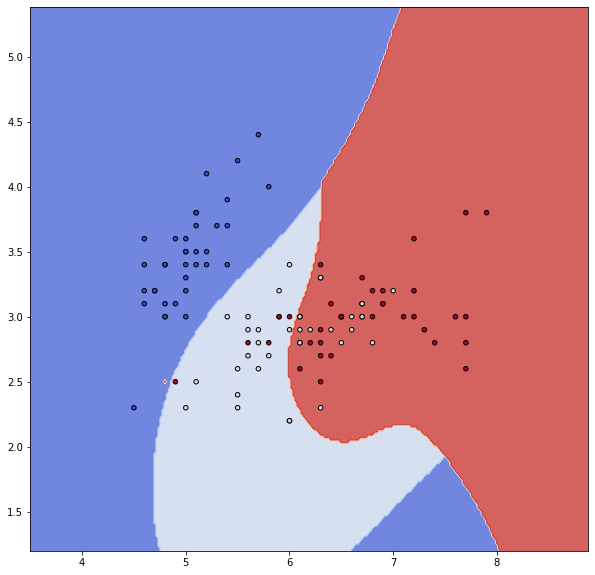

In [90]:
svc = SVC(kernel='rbf', C=10, gamma=1.0) 
pred = svc.fit(iris_X_train, iris_y_train)

U, V = iris_X_train[:, 0], iris_X_train[:, 1] 
xx, yy = make_meshgrid(U, V)

figsize = 10 
fig = plt.figure(figsize=(figsize,figsize)) 
ax = plt.subplot(111) 
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) 
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k') 
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 
plt.show()

> C = 10, gamma = 10

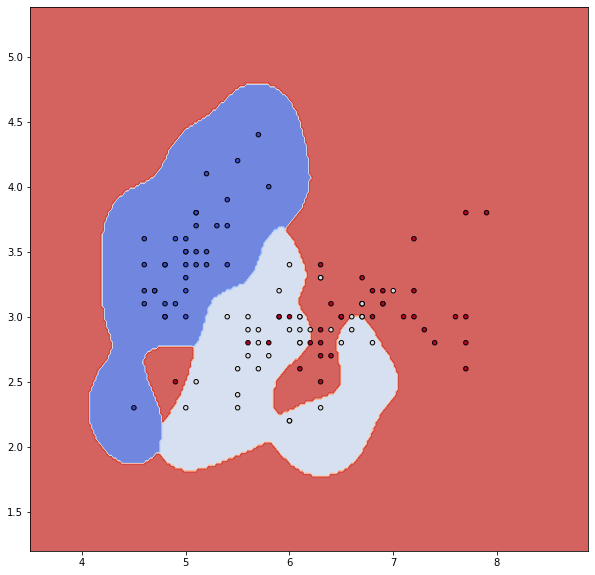

In [91]:
svc = SVC(kernel='rbf', C=10, gamma=10.0) 
pred = svc.fit(iris_X_train, iris_y_train)

U, V = iris_X_train[:, 0], iris_X_train[:, 1] 
xx, yy = make_meshgrid(U, V)

figsize = 10 
fig = plt.figure(figsize=(figsize,figsize)) 
ax = plt.subplot(111) 
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) 
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k') 
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 
plt.show()

> C = 10, gamma = 100

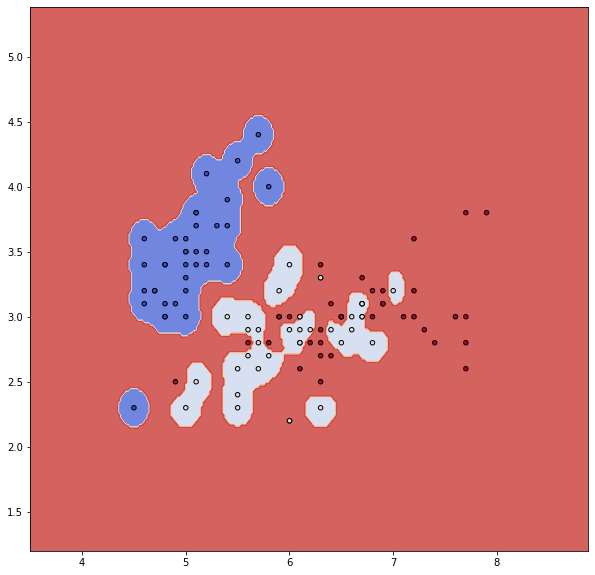

In [92]:
svc = SVC(kernel='rbf', C = 10, gamma=100.0) 
pred = svc.fit(iris_X_train, iris_y_train)

U, V = iris_X_train[:, 0], iris_X_train[:, 1] 
xx, yy = make_meshgrid(U, V)

figsize = 10 
fig = plt.figure(figsize=(figsize,figsize)) 
ax = plt.subplot(111) 
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) 
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k') 
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 
plt.show()

> C = 100, gamma = 1

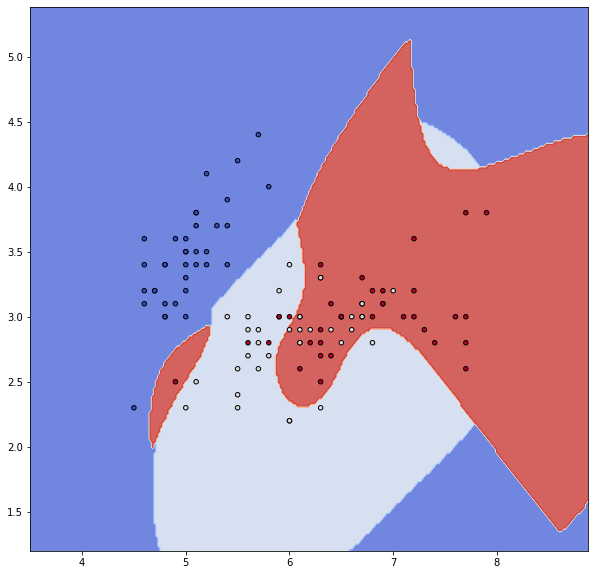

In [93]:
svc = SVC(kernel='rbf', C=100, gamma=1.0) 
pred = svc.fit(iris_X_train, iris_y_train)

U, V = iris_X_train[:, 0], iris_X_train[:, 1] 
xx, yy = make_meshgrid(U, V)

figsize = 10 
fig = plt.figure(figsize=(figsize,figsize)) 
ax = plt.subplot(111) 
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) 
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k') 
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 
plt.show()

> C = 100, gamma = 10

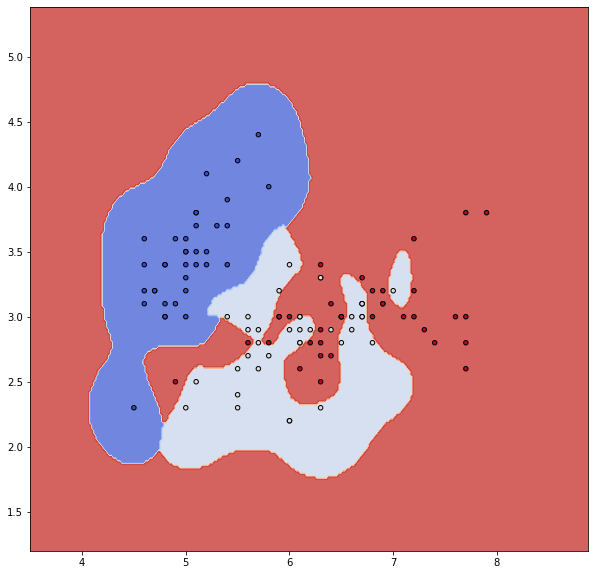

In [94]:
svc = SVC(kernel='rbf', C=100, gamma=10.0) 
pred = svc.fit(iris_X_train, iris_y_train)

U, V = iris_X_train[:, 0], iris_X_train[:, 1] 
xx, yy = make_meshgrid(U, V)

figsize = 10 
fig = plt.figure(figsize=(figsize,figsize)) 
ax = plt.subplot(111) 
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) 
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k') 
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 
plt.show()

> C = 100, gamma = 100

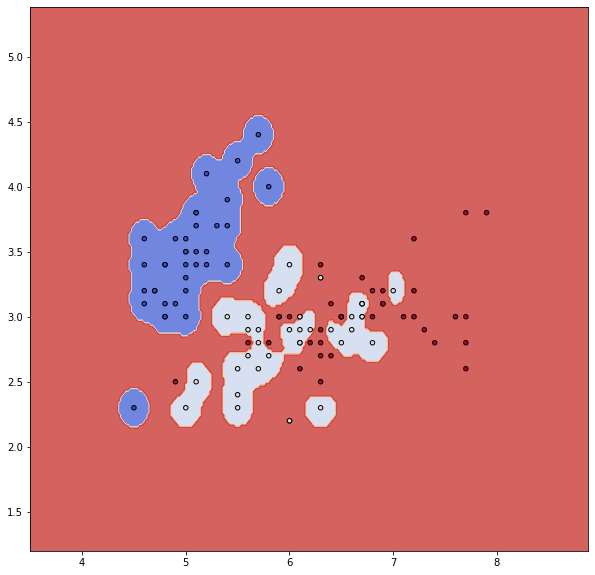

In [95]:
svc = SVC(kernel='rbf', C=100, gamma=100.0) 
pred = svc.fit(iris_X_train, iris_y_train)

U, V = iris_X_train[:, 0], iris_X_train[:, 1] 
xx, yy = make_meshgrid(U, V)

figsize = 10 
fig = plt.figure(figsize=(figsize,figsize)) 
ax = plt.subplot(111) 
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) 
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k') 
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 
plt.show()

> C = 1000, gamma = 1

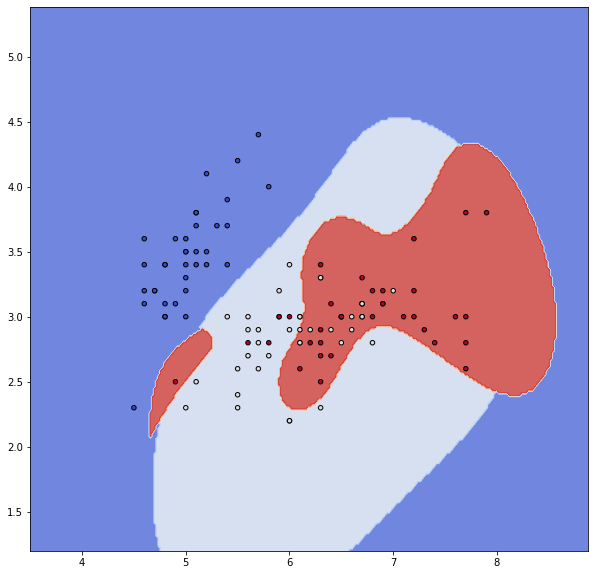

In [96]:
svc = SVC(kernel='rbf', C=1000, gamma=1.0) 
pred = svc.fit(iris_X_train, iris_y_train)

U, V = iris_X_train[:, 0], iris_X_train[:, 1] 
xx, yy = make_meshgrid(U, V)

figsize = 10 
fig = plt.figure(figsize=(figsize,figsize)) 
ax = plt.subplot(111) 
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) 
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k') 
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 
plt.show()

> C = 1000, gamma = 10

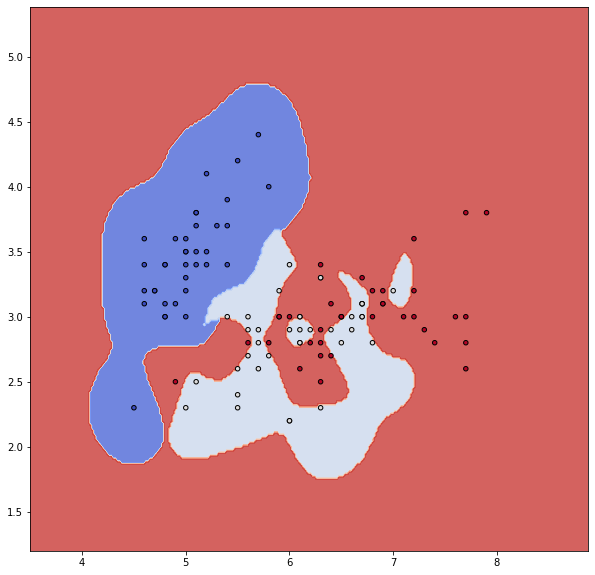

In [97]:
svc = SVC(kernel='rbf', C=1000, gamma=10.0) 
pred = svc.fit(iris_X_train, iris_y_train)

U, V = iris_X_train[:, 0], iris_X_train[:, 1] 
xx, yy = make_meshgrid(U, V)

figsize = 10 
fig = plt.figure(figsize=(figsize,figsize)) 
ax = plt.subplot(111) 
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) 
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k') 
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 
plt.show()

> C = 1000, gamma = 100

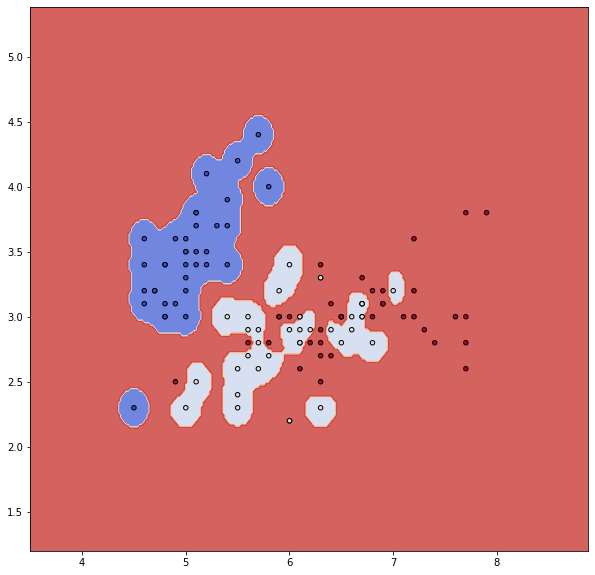

In [98]:
svc = SVC(kernel='rbf', C=1000, gamma=100.0) 
pred = svc.fit(iris_X_train, iris_y_train)

U, V = iris_X_train[:, 0], iris_X_train[:, 1] 
xx, yy = make_meshgrid(U, V)

figsize = 10 
fig = plt.figure(figsize=(figsize,figsize)) 
ax = plt.subplot(111) 
plot_contours(ax, svc, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8) 
ax.scatter(U, V, c=iris_y_train, cmap=plt.cm.coolwarm, s=20, edgecolors='k') 
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max()) 
plt.show()

##### <span style="color:orange">Result</span>

 <span style="color:red"><strong>C는 데이터 샘플들이 다른 클래스에 놓이는 것을 허용하는 정도를 결정한다.</strong></span><br>
C가 클수록 이상치(outlier)를 허용하지 않게 되어 엄격하게 분류하게 되며, 이 경우 margin보다 right classification에 주목한다.<br>
반면 C가 작을수록 이상치(outlier)가 있다고 가정하며 그것들을 허용하는 방향으로 decision boundary가 형성된다.<br>
<br>
 <span style="color:red"><strong>Gamma는 decision boundary의 곡률을 결정한다. 즉, 하나의 데이터가 영향력을 행사하는 정도를 결정한다고 할 수 있다.</strong></span><br>
Gaama가 클수록 하나의 데이터가 주변에 영향력을 행사하는 정도(거리)가 작아지며, decision boundary의 곡률이 더욱 굴곡지게 된다.<br>
반면 Gamma가 작을수록 영향력을 행사하는 정도가 커지며, decision boundary의 곡률이 비교적 완만해진다.<br>
<br>
두 parameter 모두 너무 작을 경우 under-fitting 될 가능성이 크고, 너무 클 경우 over-fitting 의 위험이 있다.